In [1]:
import random
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
layer_width = 512
model_seed = 52233264

In [4]:
seed = model_seed
print("Seed: ", seed)
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)

Seed:  52233264


In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

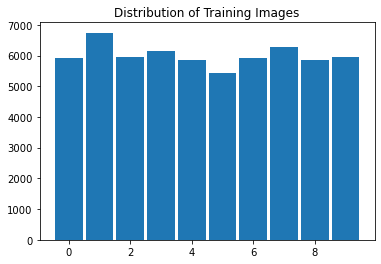

In [6]:
import matplotlib.pyplot as plt
plt.hist(train_labels, bins=range(11), rwidth=0.9, align='left');
plt.title("Distribution of Training Images");

In [7]:
def create_model(layer_width=32):
    return keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(layer_width, activation=tf.nn.relu),
        keras.layers.Dense(layer_width, activation=tf.nn.relu),
#         keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [8]:
model = create_model(layer_width)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels,
          batch_size=1024, 
          epochs=25, 
          verbose=1,
          validation_data=(test_images, test_labels))

Epoch 1/25
59/59 [==============================] - 1s 12ms/step - loss: 0.8301 - accuracy: 0.7757 - val_loss: 0.1886 - val_accuracy: 0.9449
Epoch 2/25
59/59 [==============================] - 0s 5ms/step - loss: 0.1786 - accuracy: 0.9490 - val_loss: 0.1298 - val_accuracy: 0.9605
Epoch 3/25
59/59 [==============================] - 0s 6ms/step - loss: 0.1115 - accuracy: 0.9688 - val_loss: 0.1016 - val_accuracy: 0.9684
Epoch 4/25
59/59 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9776 - val_loss: 0.0822 - val_accuracy: 0.9741
Epoch 5/25
59/59 [==============================] - 0s 6ms/step - loss: 0.0567 - accuracy: 0.9840 - val_loss: 0.0731 - val_accuracy: 0.9791
Epoch 6/25
59/59 [==============================] - 0s 6ms/step - loss: 0.0413 - accuracy: 0.9886 - val_loss: 0.0737 - val_accuracy: 0.9775
Epoch 7/25
59/59 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9905 - val_loss: 0.0678 - val_accuracy: 0.9787
Epoch 8/25
59/59 [=

In [10]:
print('Evaluating')
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print("*************************************")

Evaluating
313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9821
Test accuracy: 0.9821000099182129
*************************************


In [11]:
# Folder to save models
cur_folder = os.getcwd()
model_folder = os.path.join(cur_folder,"models")
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

In [12]:
model_name = "mnist_dense" + '-w' + str(layer_width) + 'x' + str(layer_width) + '-' + str(seed) +".h5"
model_file = os.path.join(model_folder, model_name)
print(model_file)
model.save(model_file)

/repos/matvec/models/mnist_dense-w512x512-52233264.h5


In [13]:
# !jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True train_mnist.ipynb

In [14]:
# !jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True inject_dropout_mnist-Copy3.ipynb

In [15]:
# !jupyter nbconvert --to script inject_dropout_mnist-script_maker.ipynb